# Лабораторна робота 1

З генеральної сукупності взято вибірку:

In [1]:
import numpy as np

l = """
3 3 1 0 0 3 3 5 3 0 0 4 1 5 1 6 5 4 7 4
5 3 3 0 2 3 1 4 1 2 4 3 4 5 4 0 5 6 6 3
5 4 1 3 3 6 3 1 1 5 2 3 5 3 3 4 1 5 6 1
3 3 3 5 6 1 2 1 3 4"""
a = [int(s) for s in l.split()]
an = np.array(a)
an

array([3, 3, 1, 0, 0, 3, 3, 5, 3, 0, 0, 4, 1, 5, 1, 6, 5, 4, 7, 4, 5, 3, 3,
       0, 2, 3, 1, 4, 1, 2, 4, 3, 4, 5, 4, 0, 5, 6, 6, 3, 5, 4, 1, 3, 3, 6,
       3, 1, 1, 5, 2, 3, 5, 3, 3, 4, 1, 5, 6, 1, 3, 3, 3, 5, 6, 1, 2, 1, 3,
       4])

Сумма генеральної сукупності

In [2]:
an.sum()

218

In [3]:
sum(a)

218

1) Запишемо варіаційний ряд

абсолютні частоти

In [4]:
import collections
counter = collections.Counter(an)
l_keys = list(counter.keys())
l_values = list(counter.values()) 
print(l_keys)
print(l_values)

[0, 1, 2, 3, 4, 5, 6, 7]
[6, 12, 4, 20, 10, 11, 6, 1]


In [5]:
hist, bin_edges = np.histogram(an)
print(np.unique(an))
print(hist)

[0 1 2 3 4 5 6 7]
[ 6 12  4  0 20 10  0 11  6  1]


In [6]:
ls = []
print(list(set(an)))
for j in list(set(an)):
    ls.append(np.count_nonzero(an == j))
print(ls)

[0, 1, 2, 3, 4, 5, 6, 7]
[6, 12, 4, 20, 10, 11, 6, 1]


In [7]:
from itertools import groupby
freq = {key:len(list(group)) for key, group in groupby(np.sort(an))}
print(freq)
print(list(freq.keys()))
print(list(freq.values()))

{0: 6, 1: 12, 2: 4, 3: 20, 4: 10, 5: 11, 6: 6, 7: 1}
[0, 1, 2, 3, 4, 5, 6, 7]
[6, 12, 4, 20, 10, 11, 6, 1]


2) Обчислимо моду

In [8]:
from statistics import mode
mode(an)

3

In [9]:
repeticiones = 0
for i in a:
    apariciones = a.count(i)
    if apariciones > repeticiones:
        repeticiones = apariciones

modas = []
for i in a:
    apariciones = a.count(i)
    if apariciones == repeticiones and i not in modas:
        modas.append(i)

print(modas)

[3]


In [10]:
counts = np.bincount(an)
print(np.argmax(counts))

3


Медіана

In [11]:
from statistics import median
print(np.median(an))
print(median(an))

3.0
3.0


Варіаційний ряд відносних частот

In [12]:
print(l_keys)
print(l_values)
l_rel =[]
for i in l_values:
    l_rel.append(round(i / len(an), 3))
print(l_rel)

[0, 1, 2, 3, 4, 5, 6, 7]
[6, 12, 4, 20, 10, 11, 6, 1]
[0.086, 0.171, 0.057, 0.286, 0.143, 0.157, 0.086, 0.014]


In [13]:
print(l_keys)
print(l_values)
l_rel =[]
for i in l_values:
    l_rel.append(i / len(a))
print(np.array(l_rel))

[0, 1, 2, 3, 4, 5, 6, 7]
[6, 12, 4, 20, 10, 11, 6, 1]
[ 0.08571429  0.17142857  0.05714286  0.28571429  0.14285714  0.15714286
  0.08571429  0.01428571]


Гістограма та полігон абсолютних частот

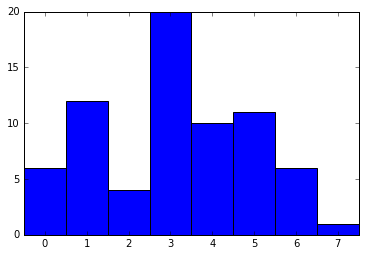

In [29]:
import matplotlib.pyplot as plt
width = 1
plt.bar(list(counter), l_values, width)
plt.xticks(np.arange(len(l_keys)) + width * 0.5, l_keys)
plt.show()

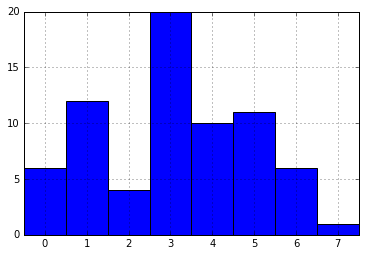

In [15]:
from collections import Counter
labels, values = zip(*Counter(a).items())
indexes = np.arange(len(labels))
width = 1
plt.grid(True)
plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.show()

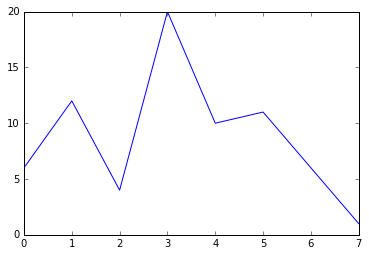

In [16]:
plt.plot(list(counter.keys()), values)
plt.show()

In [17]:
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
iplot([{"x": list(counter), "y": l_values}])

Гістограма та полігон відносних частот

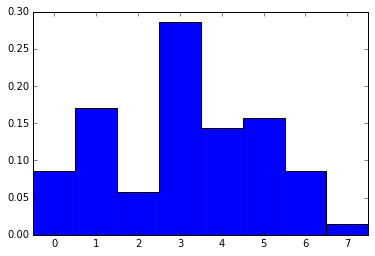

In [30]:
plt.bar(list(counter), l_rel, width)
plt.xticks(np.arange(len(l_keys)) + width * 0.5, l_keys)
plt.show()

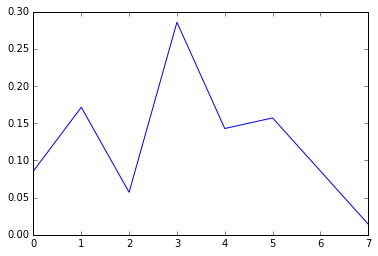

In [19]:
plt.plot(list(counter.keys()), l_rel)
plt.show()

In [20]:
init_notebook_mode(connected=True)
iplot([{"x": list(counter.keys()), "y": l_rel}])

4.1) Вибіркове середнє є незміщеною оцінкою генерального середнього і обчислюються за формулою.
Sample mean and covariance

In [21]:
from statistics import mean
print(mean(a))
print(np.mean(an))

3.1142857142857143
3.11428571429


4.2) Знайдемо незміщену оцінку генеральної дисперсії та середнього квадратичного відхилення:

sample variance

In [22]:
from statistics import variance
print(variance((a)))
print(np.cov(an))

3.3200828157349895
3.32008281573499


Знайдемо середнє відхилення.


mean absolute deviation MAD

In [23]:
n = float(len(an))
mean = sum(an) / n
diff = [abs(x - mean) for x in an]
sum(diff) / n

1.4514285714285713

sqrt(Db)

In [24]:
from statistics import pvariance
from math import sqrt
print(sqrt(pvariance((a))))
print(sqrt(np.var(an)))

1.8090475563744834
1.8090475563744837


Знайдемо коефіцієнт варіації V 

Statistical dispersion

In [25]:
print((sqrt(np.var(an)) / np.mean(an)) )

0.580886830029


Накопичені частоти сортовані

In [26]:
ls = []
print(l_rel)
for i in range(len(l_rel)):
    ls.append(sum(l_rel[i:len(l_rel)]))
ls.reverse()

[0.08571428571428572, 0.17142857142857143, 0.05714285714285714, 0.2857142857142857, 0.14285714285714285, 0.15714285714285714, 0.08571428571428572, 0.014285714285714285]


Накопичені частоти

In [27]:
cumulative_frequencies = np.cumsum(l_rel).round(3)
cumulative_frequencies

array([ 0.086,  0.257,  0.314,  0.6  ,  0.743,  0.9  ,  0.986,  1.   ])

Складемо другу статистичну таблицю

In [28]:
l_rel = np.array(l_rel).round(3)
import pandas as pd
x = pd.DataFrame({'Варіанта': range(len(l_keys)), 'Абсолютні частоти': list(counter.values()),
                  'Відносні частоти': l_rel, 
                  'Накопичені частоти': cumulative_frequencies})
x

,Абсолютні частоти,Варіанта,Відносні частоти,Накопичені частоти
0,6,0,0.086,0.086
1,12,1,0.171,0.257
2,4,2,0.057,0.314
3,20,3,0.286,0.600
4,10,4,0.143,0.743
5,11,5,0.157,0.900
6,6,6,0.086,0.986
7,1,7,0.014,1.000
